# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Scrape the website
html = browser.html
# Create a Beautiful Soup object
soup = BeautifulSoup(html, "html.parser")

In [5]:
# Extract all rows of data
all_rows=soup.find_all("tr", class_="data-row")

terrestrial_date### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list for data rows
data_rows = []
# Loop through the scraped data to create a list of data rows
for row in all_rows:
    r=row.find_all("td")
    id=r[0].text
    terrestrial_date=r[1].text
    sol=r[2].text
    ls=r[3].text
    month=r[4].text
    min_temp=r[5].text
    pressure=r[6].text
    row_dict={"id":id, "terrestrial_date":terrestrial_date, "sol":sol, "ls":ls, 
              "month":month, "min_temp":min_temp, "pressure":pressure}
    data_rows.append(row_dict)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_rows)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df = mars_df.astype({"sol":"int64", "ls":"int64", "month":"int64", 
                          "min_temp":"float64", "pressure":"float64"})

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars? 12 Martian months listed
mars_df.groupby(["month"])["id"].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there? 1867
len(mars_df["sol"].unique())

1867

In [14]:
# 3. What is the average low temperature by month?
avg_min_temp = mars_df.groupby(["month"])["min_temp"].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

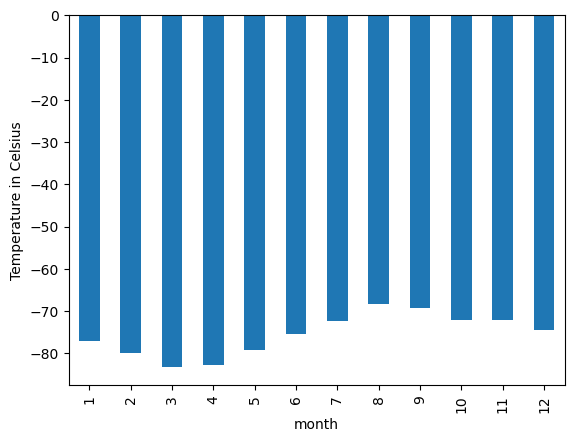

In [15]:
# Plot the average temperature by month
avg_min_temp.plot(kind="bar", ylabel="Temperature in Celsius")
plt.show()

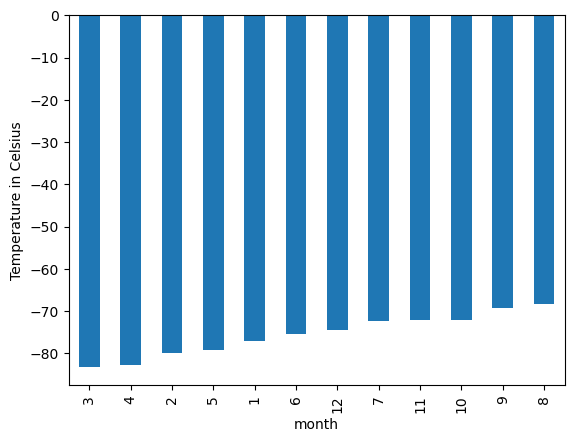

In [16]:
# Identify the coldest and hottest months in Curiosity's location: 
# On average,coldest = 8, hottest = 3
avg_min_temp=avg_min_temp.sort_values()
avg_min_temp.plot(kind="bar", ylabel="Temperature in Celsius")
plt.show()

In [17]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby(["month"])["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

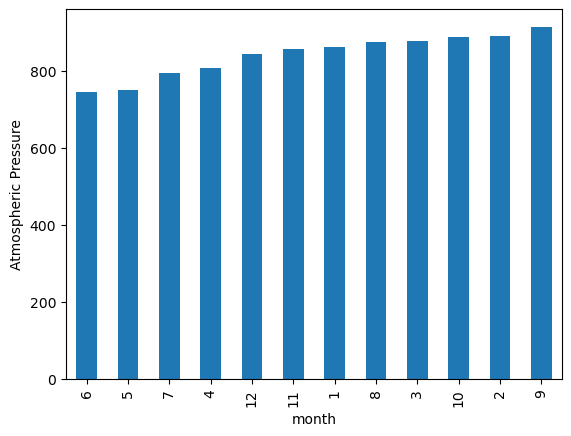

In [18]:
# Plot the average pressure by month: 
# On average, lowest in month 6 and highest in month 9
avg_pressure=avg_pressure.sort_values(ascending=True)
avg_pressure.plot(kind="bar", ylabel="Atmospheric Pressure")
plt.show()

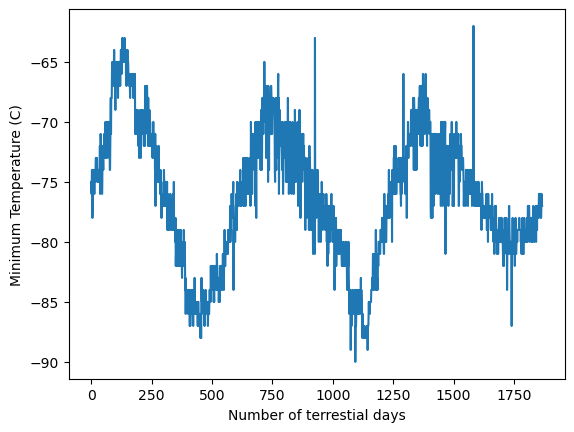

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year? 
# Visually estimate the result by plotting the daily minimum temperature.
# Using valleys: ~(1100-450) = ~650

mars_df["min_temp"].plot(ylabel="Minimum Temperature (C)", xlabel="Number of terrestial days")
plt.show()

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Use the available data to determine the actual value

# This code assumes table remains in chronological order of earliest to latest
# Find the FIRST row with solar longitude = 0 
sol_0 = mars_df[mars_df["ls"]==0]
first_earth_day = sol_0.iloc[0,1]
print(first_earth_day)

# Find the LAST row with solar longitude = 359 AFTER the first earth day before it cycles back to 0
sol_359 = mars_df.loc[(mars_df["ls"]==359) & (mars_df["terrestrial_date"]>first_earth_day)]
print(sol_359)
# the second row is the last ls 359 before it cycles
last_earth_day = sol_359.iloc[1,1]
print(last_earth_day)

earth_days = ((last_earth_day) - (first_earth_day)).days
print(f"\nThere are {earth_days} Earth days in a Martian year")

2013-08-01 00:00:00
        id terrestrial_date   sol   ls  month  min_temp  pressure
923    955       2015-06-17  1017  359     12     -78.0     850.0
924    956       2015-06-18  1018  359     12     -79.0     850.0
1577  1607       2017-05-04  1686  359     12     -75.0     838.0
1578  1608       2017-05-05  1687  359     12     -75.0     838.0
2015-06-18 00:00:00

There are 686 Earth days in a Martian year


### Question Answers

There data shows the Mars year broken into 12 months

There are 1867 Martian days worth of data

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

How many Earth days exist in a Martian year?
* The distance from peak to peak is roughly 1425-750, or 675 days.  
* The distance from valley to valley is roughly 1100-450, or 650 days. 
* Evaluating the rows of data and solar longitude indicates 686 days.
* Internet search indicates a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_df.to_csv("exports/mars_weather.csv")

In [22]:
browser.quit()